In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("paper.mplstyle")

from scipy.interpolate import interp1d
from scipy.integrate import quad
from tqdm.notebook import tqdm

import os
os.environ["ASTERIA"] = "/Users/jlazar/research/ASTERIA"
import sys
sys.path.append("/Users/jlazar/research/ASTERIA/python/")

import snewpy

from astropy import units as u
from snewpy.models import ccsn
from snewpy.neutrino import Flavor
from asteria.simulation import Simulation

from ic_sn_hnl import ParameterizedFlux, units

In [2]:
sm_flux0 = ParameterizedFlux(
    "./data/fluxactivenuE.csv",
    "./data/fluxactivenuEBar.csv",
    "./data/fluxactivenuX_div4.csv",
    10 * units["kpc"]
)
# sm_flux0.write_params("./sm_flux_1m_div.txt", scale=(units["m"] / (10 * units["kpc"]))**2)

# sm_flux1 = ParameterizedFlux(
#     "./data/fluxactivenuE.csv",
#     "./data/fluxactivenuEBar.csv",
#     "./data/fluxactivenuX.csv",
#     10 * units["kpc"]
# )
# sm_flux1.write_params("./sm_flux_1m.txt", scale=(units["m"] / (10 * units["kpc"]))**2)

## This is the model that we found count disagreement for

In [3]:
param = ccsn.Nakazato_2013.get_param_combinations()[4]
print(param)
model = "Nakazato_2013"
reference_model = snewpy.models._init_model(model, **param)

{'progenitor_mass': <Quantity 13. solMass>, 'revival_time': <Quantity 300. ms>, 'metallicity': 0.02, 'eos': 'shen'}


0.401


/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_51522/2096428830.py:34: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuearr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_51522/2096428830.py:53: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuebararr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_51522/2096428830.py:72: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_51522/2096428830.py:91: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)


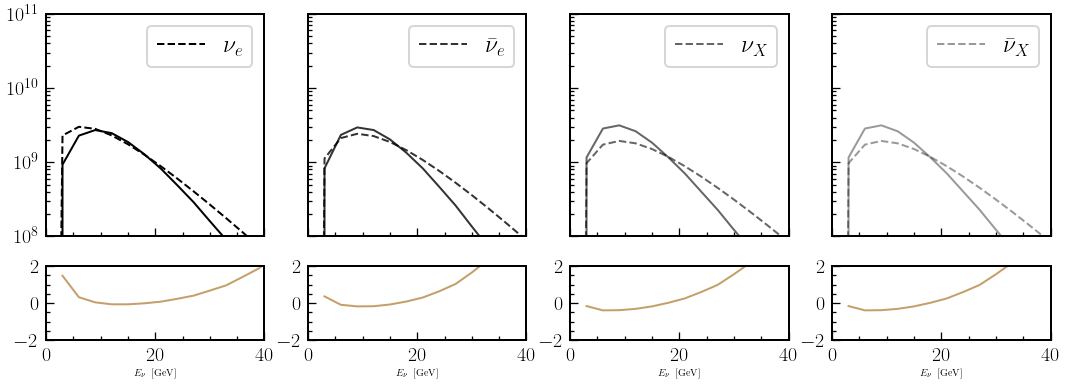

0.901


/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_51522/2096428830.py:34: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuearr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_51522/2096428830.py:53: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuebararr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_51522/2096428830.py:72: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_51522/2096428830.py:91: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)


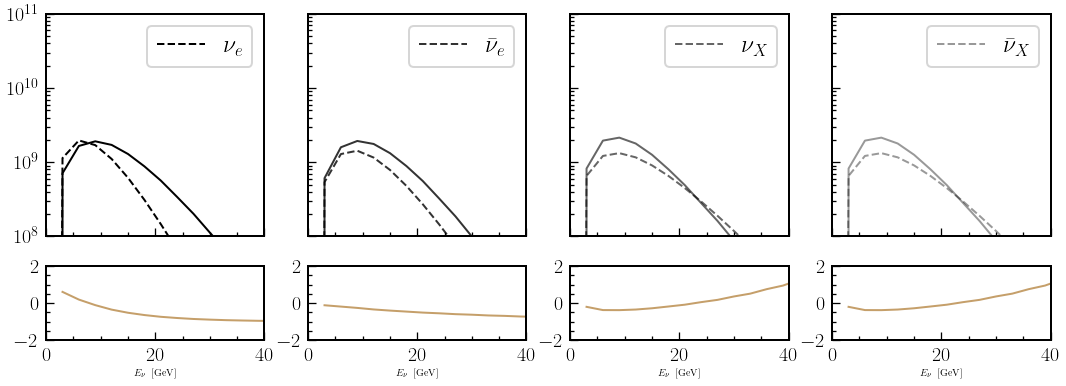

1.401


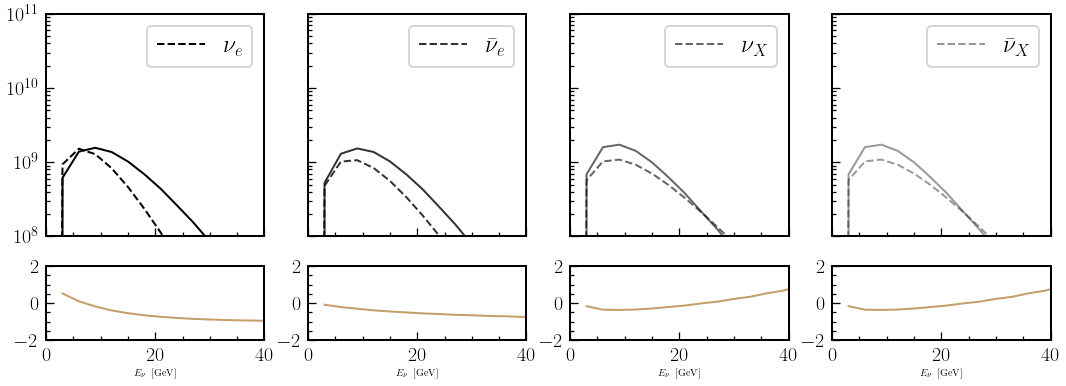

1.901


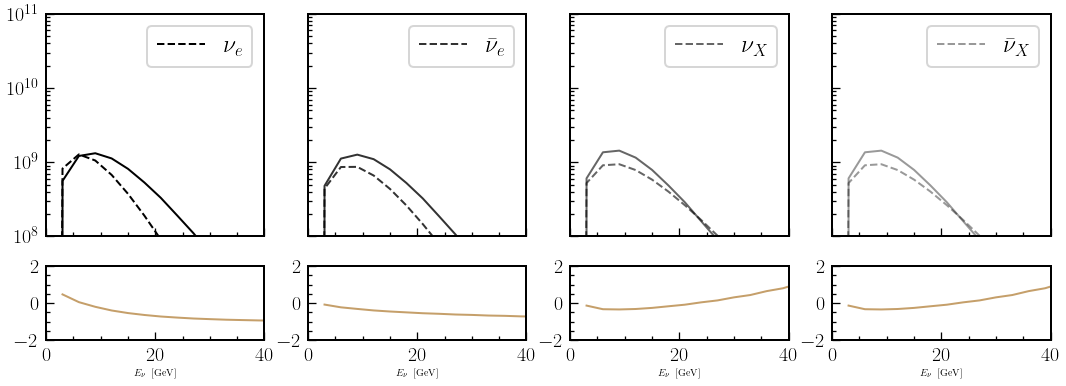

2.401


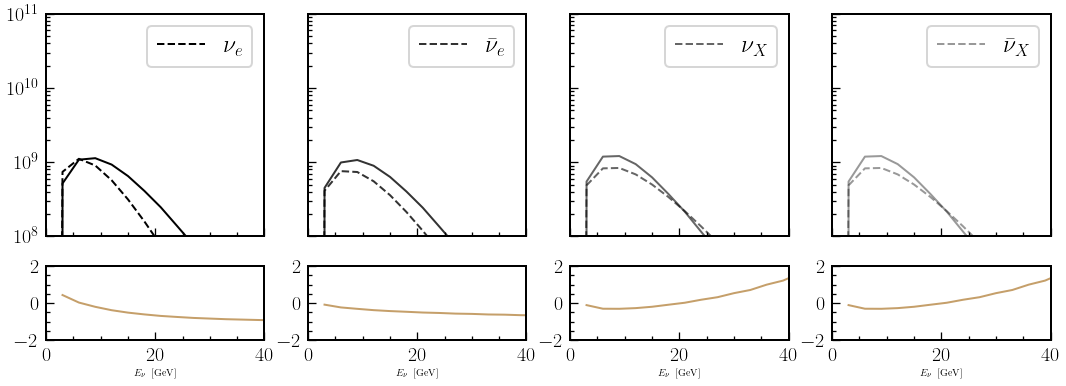

2.901


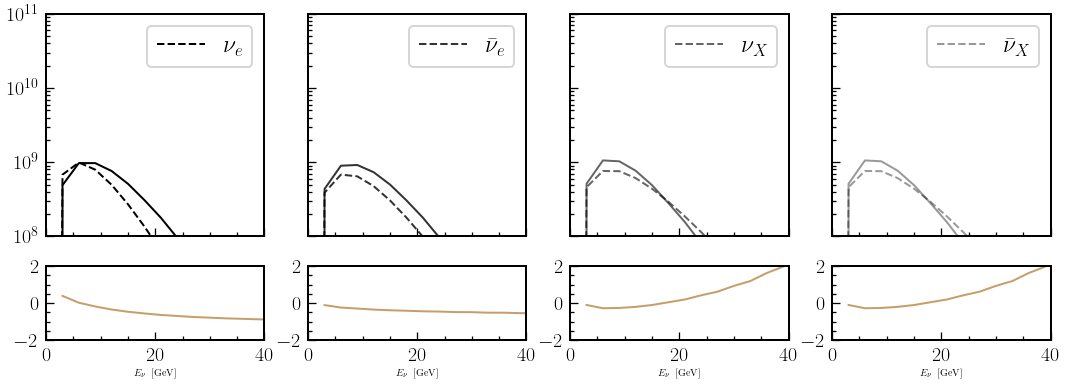

3.401


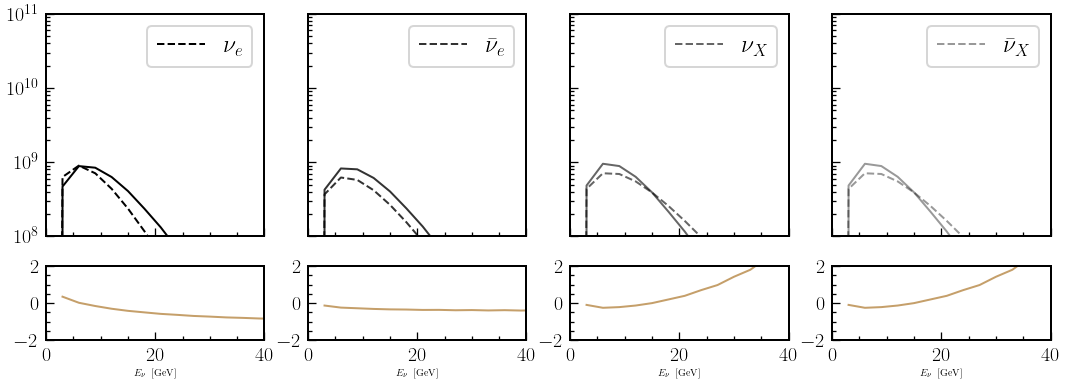

3.901


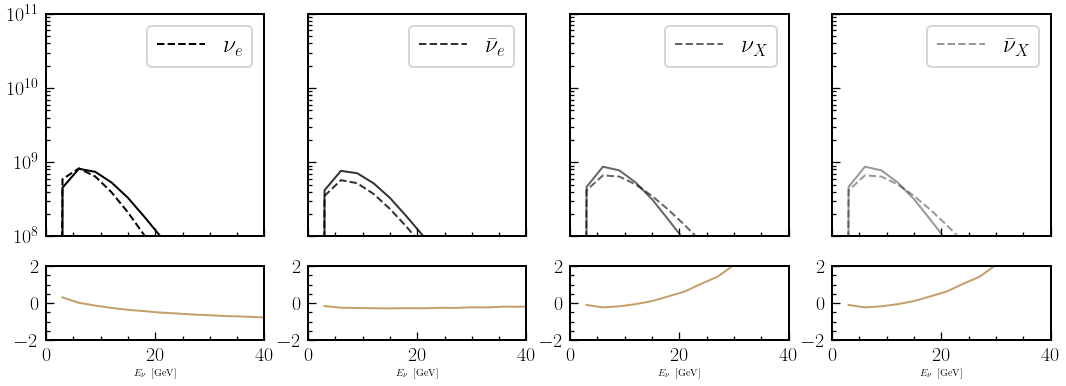

4.401000000000001


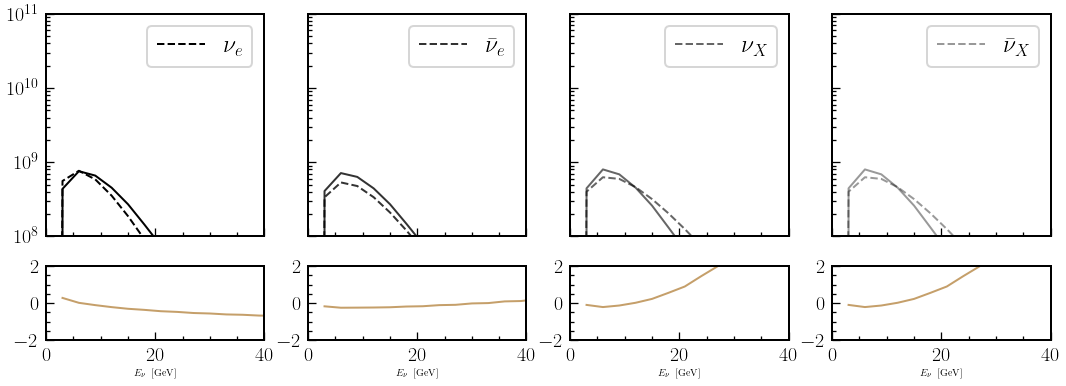

4.901000000000001


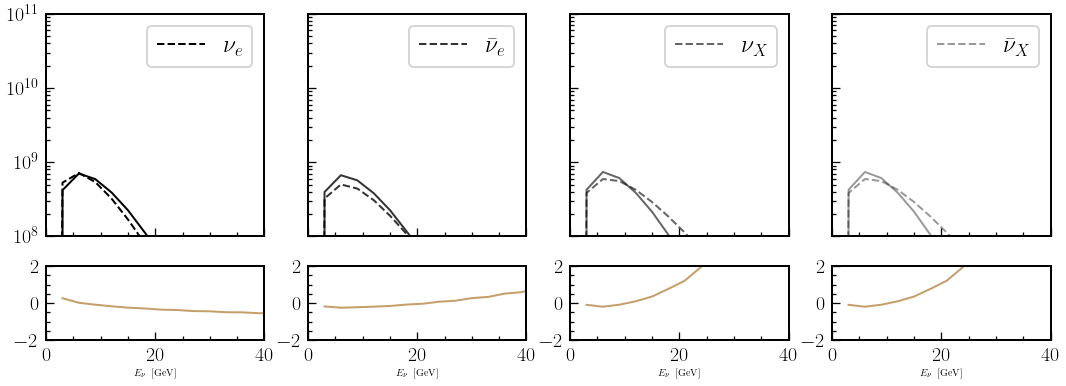

5.401000000000001


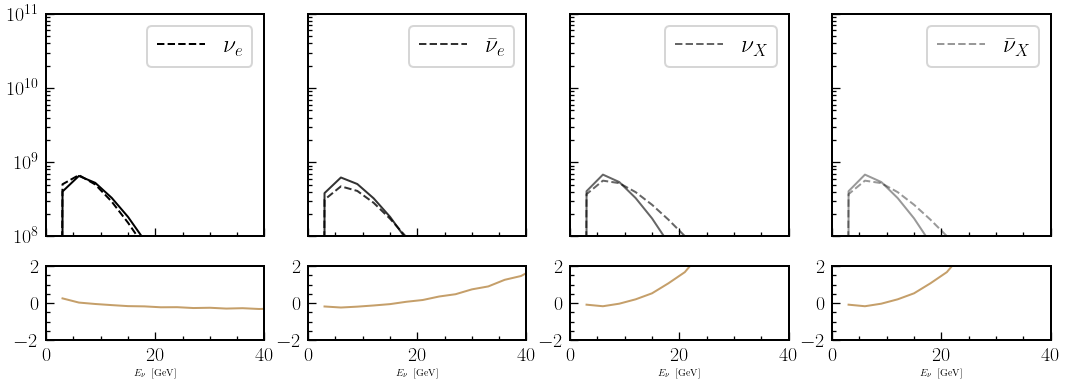

5.901000000000001


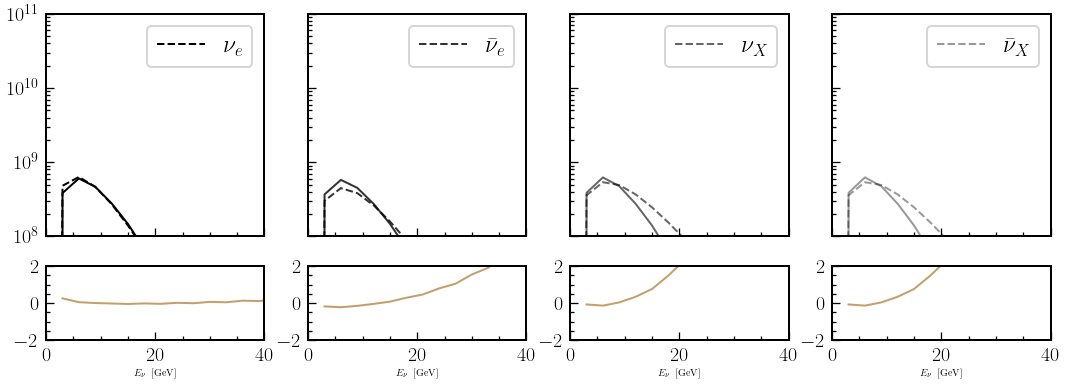

6.401000000000001


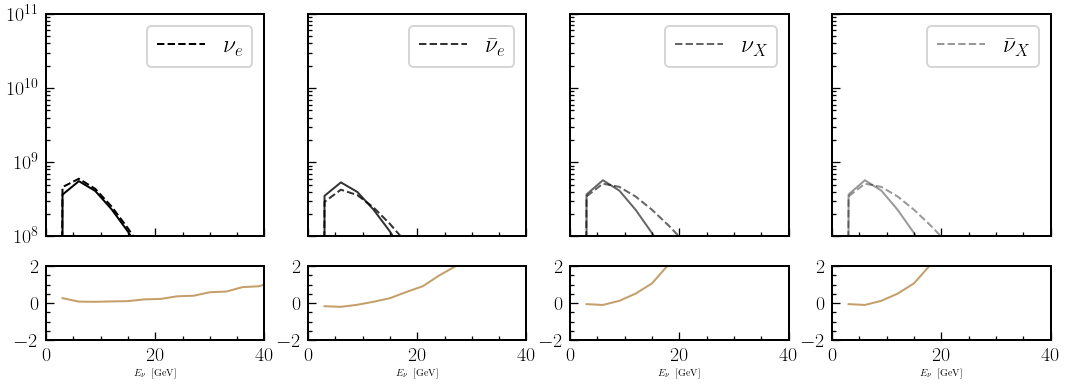

6.901000000000001


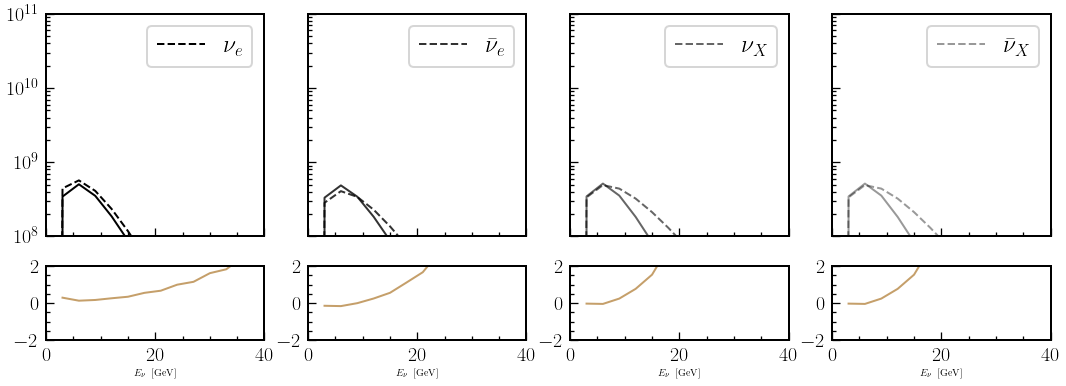

7.401000000000001


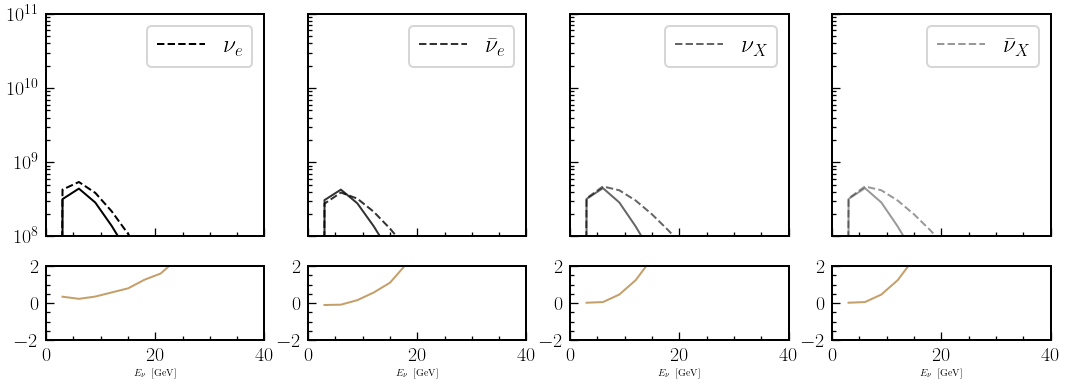

7.901000000000001


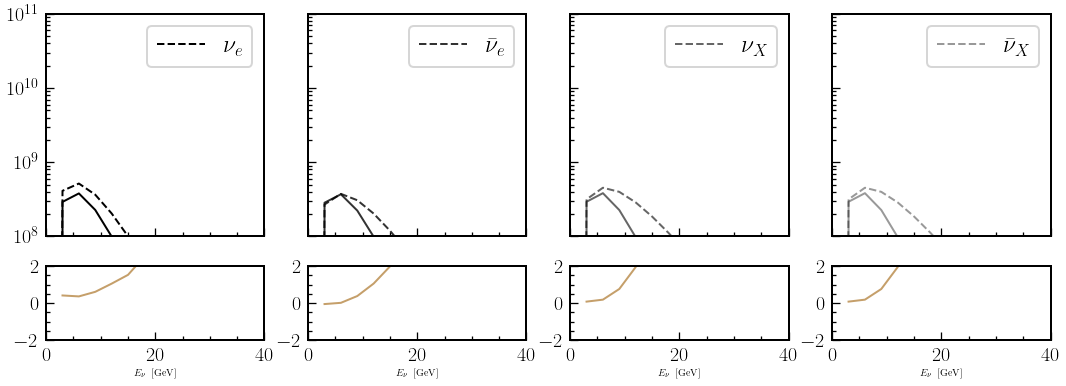

8.401


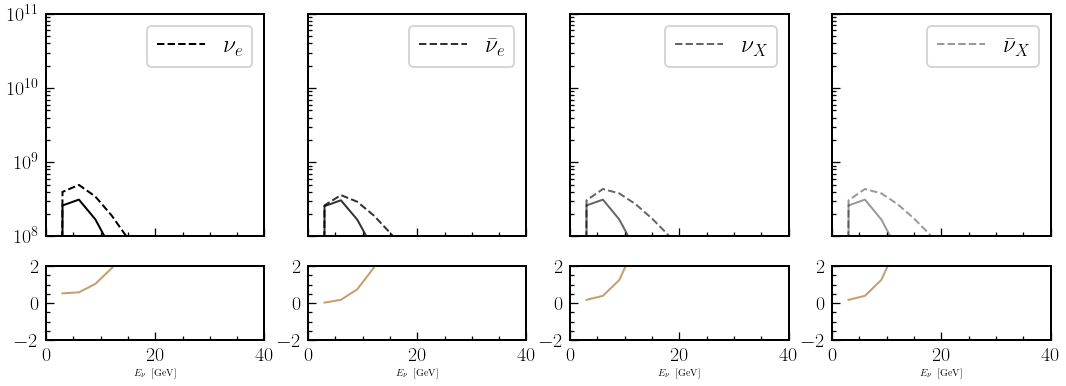

In [4]:
for idx, time in enumerate(sm_flux0._times):
    
    if idx % 5!=4:
        continue
        
    print(time)
    
    es = sm_flux0._nuearr[idx, :, 1]
    
    ax_kwargs = {
        "ylim": (1e8, 1e11),
        "xlim": (0, 40),
        "yscale": "log",
        
    }
    
    fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 6), height_ratios=(3,1))
    
    ax = axs[0, 0]
    f = reference_model.get_flux(time*u.s, es*u.MeV, 10*u.kpc)[Flavor.NU_E].value / (units["erg"] / units["MeV"])
    ax.plot(es, sm_flux0._nuearr[idx, :, 2], c="k")
    ax.plot(
        es,
        f,
        c="k",
        ls="--",
        label=r"$\nu_{e}$"
    )
    ax.set(**ax_kwargs)
    ax.set(xticklabels=[])
    ax.legend()
    
    ax = axs[1, 0]
    ax.plot(es, f / (sm_flux0._nuearr[idx, :, 2])-1)
    ax.set(xlim=(0,40), ylim=(-2,2), xlabel=r"$E_{\nu}~\left[{\rm{GeV}}\right]$",)
    
    ax = axs[0, 1]
    f = reference_model.get_flux(time*u.s, es*u.MeV, 10*u.kpc)[Flavor.NU_E_BAR].value / (units["erg"] / units["MeV"])
    ax.plot(es, sm_flux0._nuebararr[idx, :, 2], c="k", alpha=0.8)
    ax.plot(
        es,
        f,
        c="k",
        ls="--",
        alpha=0.8,
        label=r"$\bar{\nu}_{e}$"
    )
    ax.set(**ax_kwargs)
    ax.set(yticklabels=[], xticklabels=[])
    ax.legend()
    
    ax = axs[1, 1]
    ax.plot(es, f / (sm_flux0._nuebararr[idx, :, 2])-1)
    ax.set(xlim=(0,40), ylim=(-2,2), xlabel=r"$E_{\nu}~\left[{\rm{GeV}}\right]$",)
    
    ax = axs[0, 2]
    f = reference_model.get_flux(time*u.s, es*u.MeV, 10*u.kpc)[Flavor.NU_X].value / (units["erg"] / units["MeV"])
    ax.plot(es, sm_flux0._nuxarr[idx, :, 2], c="k", alpha=0.6)
    ax.plot(
        es,
        f,
        c="k",
        ls="--",
        alpha=0.6,
        label=r"$\nu_{X}$"
    )
    ax.set(**ax_kwargs)
    ax.set(yticklabels=[], xticklabels=[])
    ax.legend()
    
    ax = axs[1, 2]
    ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)
    ax.set(xlim=(0,40), ylim=(-2,2), xlabel=r"$E_{\nu}~\left[{\rm{GeV}}\right]$",)
    
    ax = axs[0, 3]
    f = reference_model.get_flux(time*u.s, es*u.MeV, 10*u.kpc)[Flavor.NU_X].value / (units["erg"] / units["MeV"])
    ax.plot(es, sm_flux0._nuxarr[idx, :, 2], c="k", alpha=0.4)
    ax.plot(
        es,
        f,
        c="k",
        ls="--",
        alpha=0.4,
        label=r"$\bar{\nu}_{X}$"
    )
    ax.set(**ax_kwargs)
    ax.set(yticklabels=[], xticklabels=[])
    ax.legend()
    
    ax = axs[1, 3]
    ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)
    ax.set(xlim=(0,40), ylim=(-2,2), xlabel=r"$E_{\nu}~\left[{\rm{GeV}}\right]$",)
    
    
    plt.show()
    

In [10]:
builtin_model

{'name': 'Nakazato_2013',
 'param': {'progenitor_mass': <Quantity 13. solMass>,
  'revival_time': <Quantity 300. ms>,
  'metallicity': 0.02,
  'eos': 'shen'}}

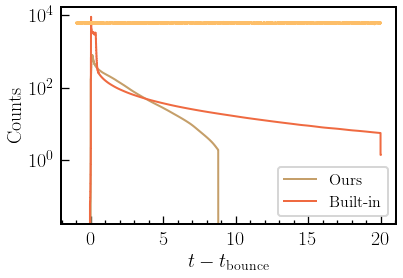

In [12]:
outfile = "./data/sm_flux_1m_with_division.txt"
distance = 1
# sm_flux0.write_params(outfile, scale=(distance*units["m"] / (10 * units["kpc"]))**2)

dt = 0.004 * u.s
sim_kwargs = {
    "Emin": 0*u.MeV,
    "Emax": 400*u.MeV,
    "dE": 0.5*u.MeV,
    "tmin": -1*u.s,
    "tmax": 20*u.s,
    "dt": 1*u.ms,
    "mixing_scheme": 'AdiabaticMSW',
    "hierarchy": 'normal',
}

analytic_model = {
    'name': 'Analytic3Species',
    'param': {
        'filename': outfile
    }
}

analytic_sim = Simulation(
    distance=distance * u.m,
    model=analytic_model,
    **sim_kwargs
)

analytic_sim.run()
analytic_sim.rebin_result(dt)

t1, hits1 = analytic_sim.detector_signal(dt)

builtin_model = {
    'name': model,
    'param': param
}

builtin_sim = Simulation(
    model=builtin_model,
    distance=10.0 * u.kpc,
    **sim_kwargs
)
builtin_sim.run()
builtin_sim.rebin_result(dt)
t2, hits2 = builtin_sim.detector_signal(dt)
sm_bg = builtin_sim.detector.i3_bg(dt, size=hits2.size) + builtin_sim.detector.dc_bg(dt, size=hits2.size)

fig, ax = plt.subplots()

ax.step(t1, hits1, label=r"Ours")
ax.step(t2, hits2, label="Built-in")
ax.step(t2, sm_bg)
ax.legend(fontsize=16)
ax.set(
    # ylim=(1e2, 1e6),
    # xlim=(0, 0.1),
    yscale="log",
)
ax.set_xlabel(xlabel=r"$t - t_{\rm{bounce}}$", fontsize=20)
ax.set_ylabel(ylabel=r"$\rm{Counts}$", fontsize=20)
plt.show()

## This is a model that we get good agreement for

In [4]:
param = {'progenitor_mass': 11.2 * u.solMass}
model = "Bollig_2016"
reference_model = snewpy.models._init_model(model, **param)

0.401


/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_96575/2096428830.py:34: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuearr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_96575/2096428830.py:53: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuebararr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_96575/2096428830.py:72: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_96575/2096428830.py:91: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)


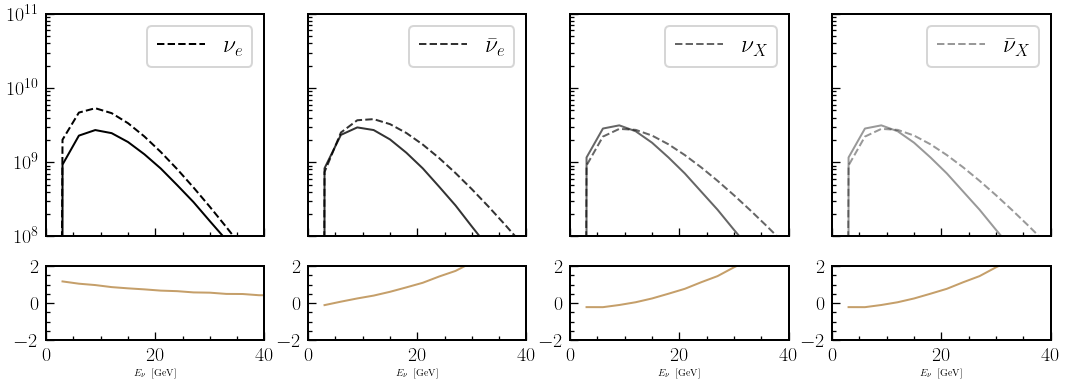

0.901


/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_96575/2096428830.py:34: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuearr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_96575/2096428830.py:53: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuebararr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_96575/2096428830.py:72: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)
/var/folders/4q/ncd7kk_j2t9_syxd3gmst9mc0000gn/T/ipykernel_96575/2096428830.py:91: RuntimeWarning: divide by zero encountered in divide
  ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)


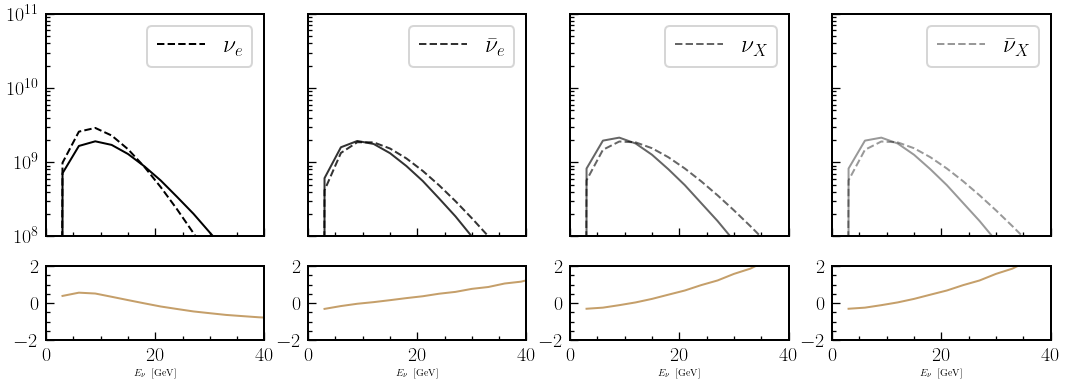

1.401


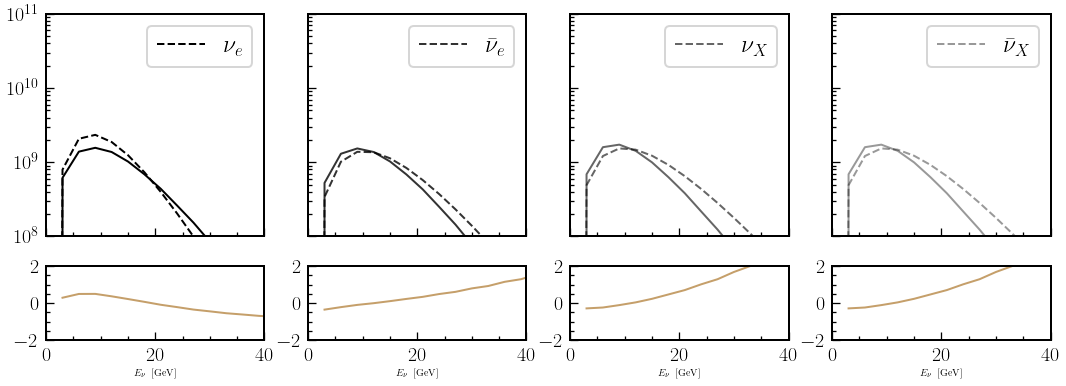

1.901


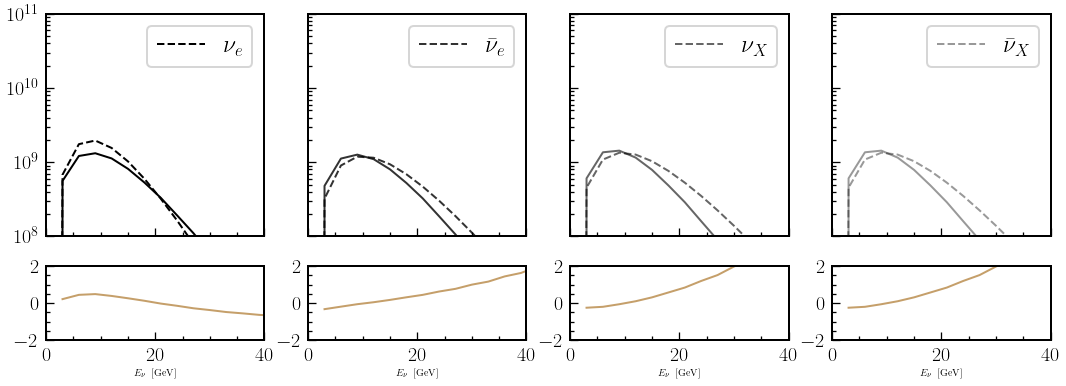

2.401


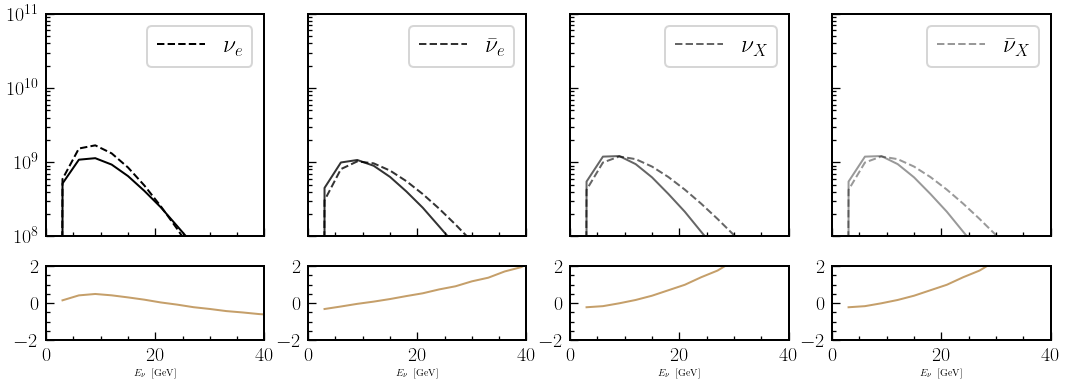

2.901


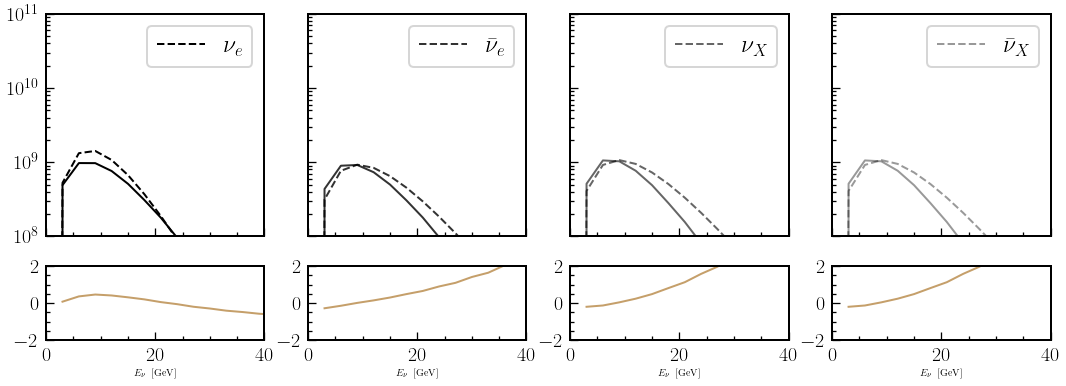

3.401


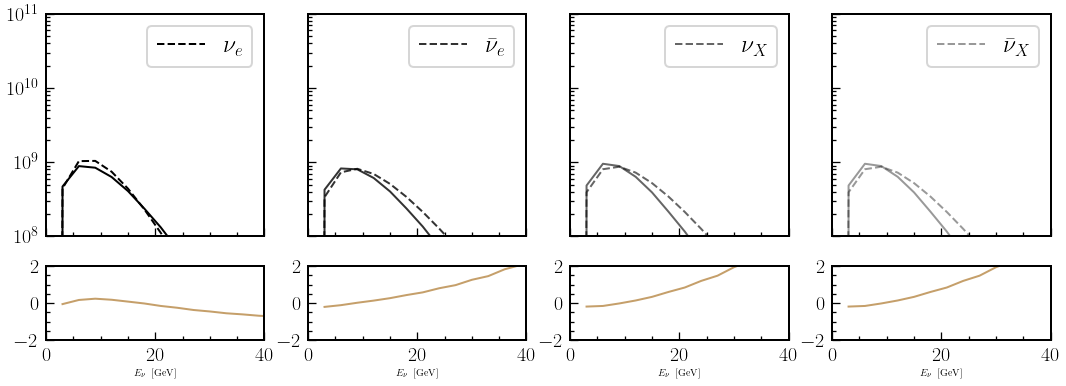

3.901


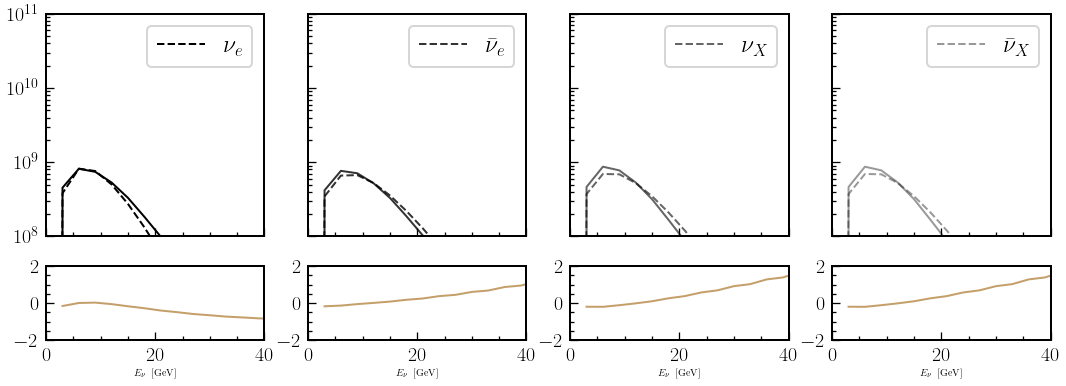

4.401000000000001


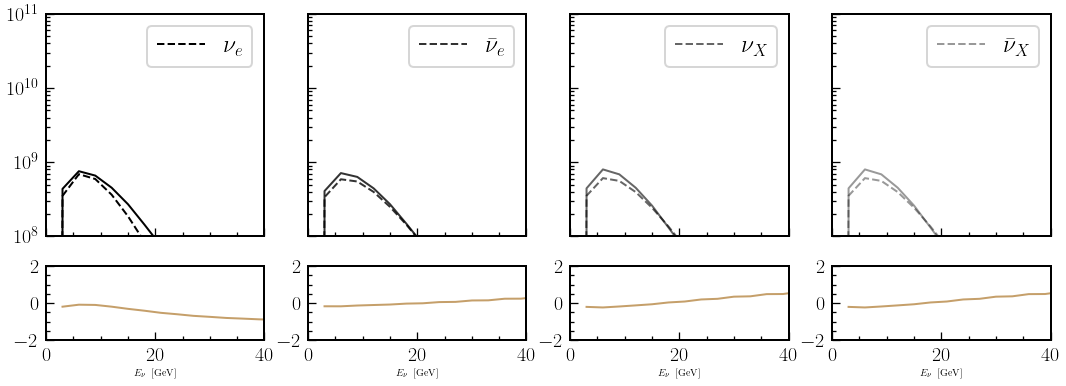

4.901000000000001


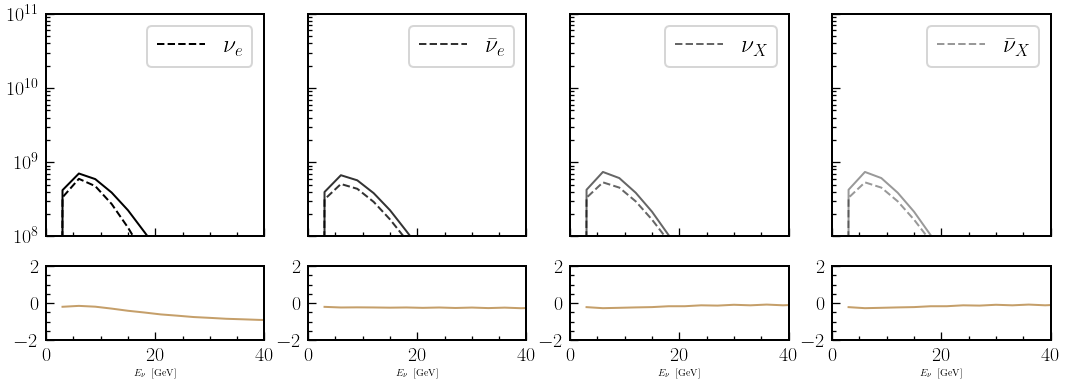

5.401000000000001


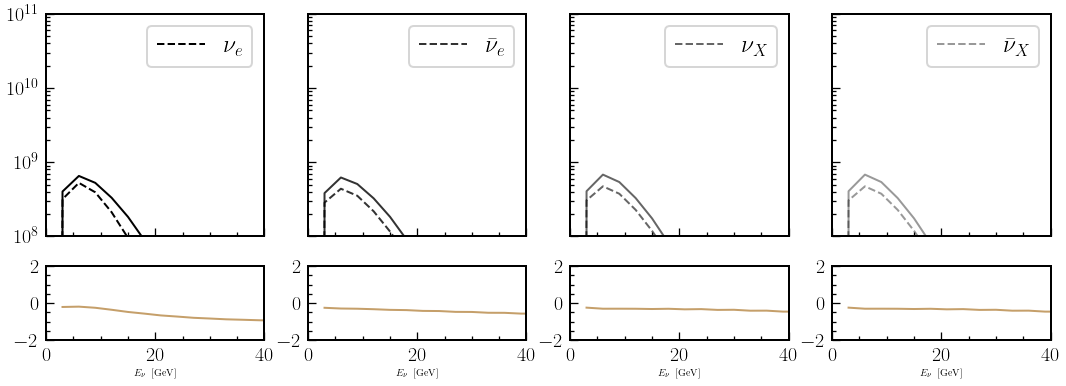

5.901000000000001


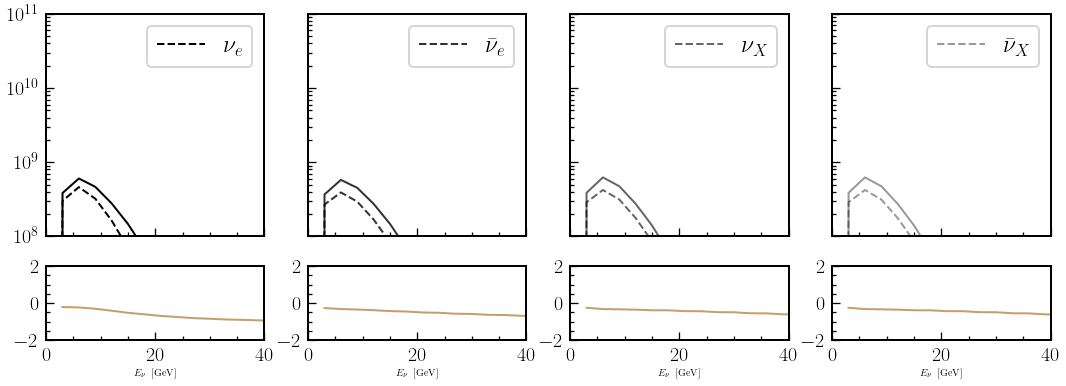

6.401000000000001


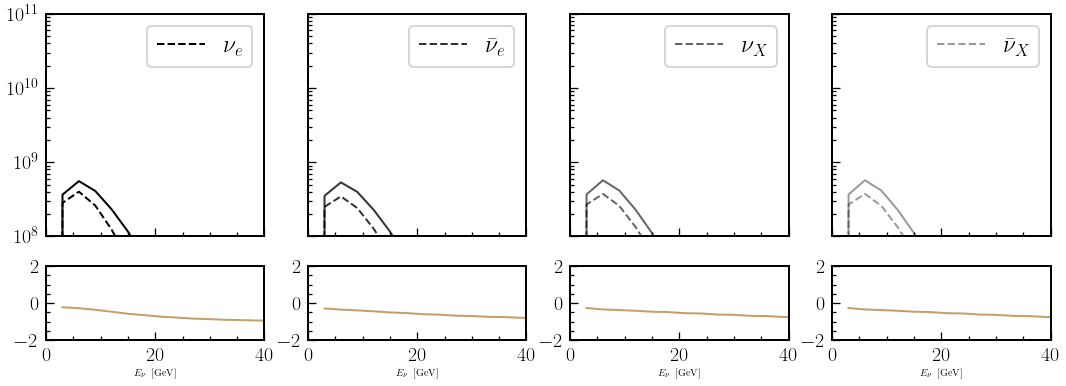

6.901000000000001


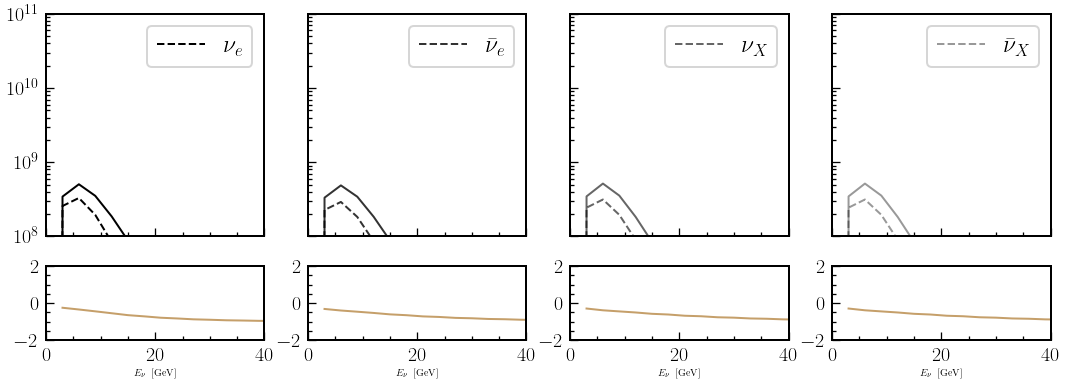

7.401000000000001


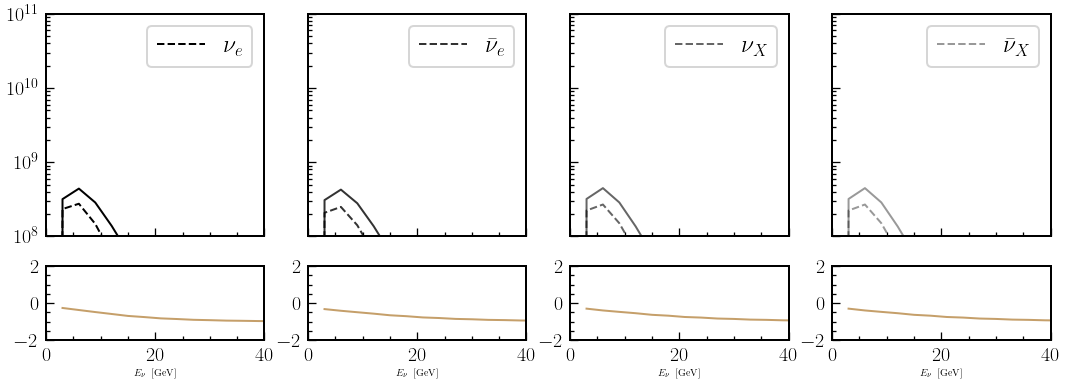

7.901000000000001


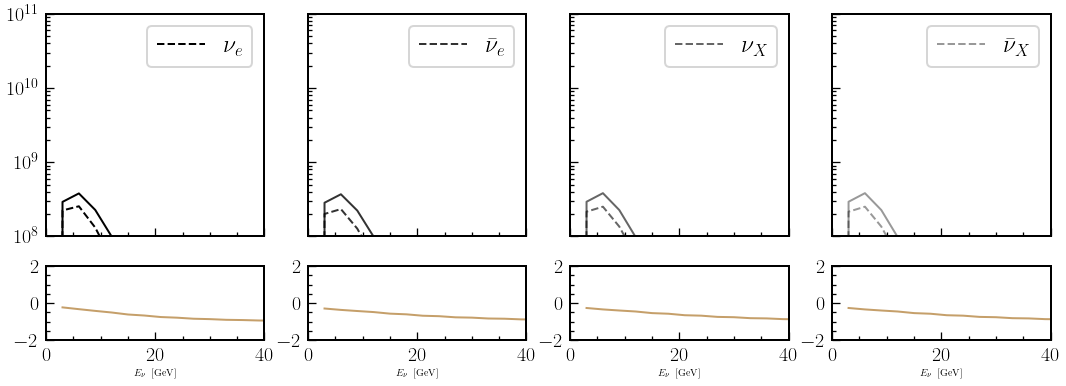

8.401


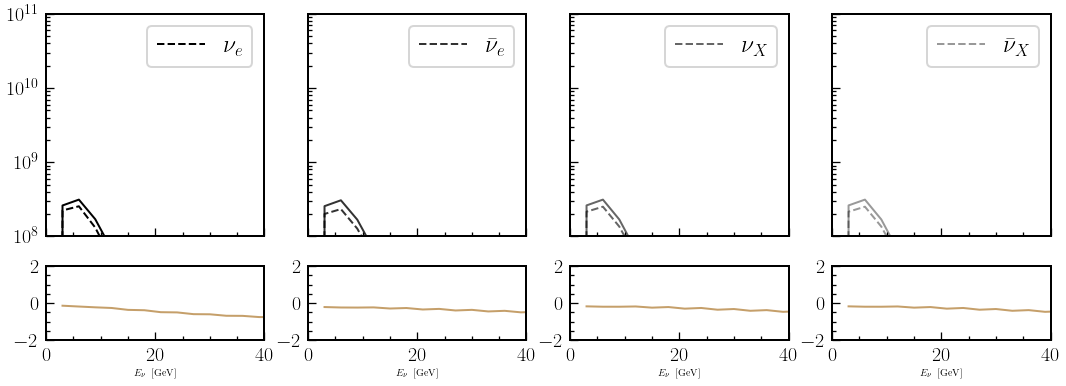

In [5]:
for idx, time in enumerate(sm_flux0._times):
    
    if idx % 5!=4:
        continue
        
    print(time)
    
    es = sm_flux0._nuearr[idx, :, 1]
    
    ax_kwargs = {
        "ylim": (1e8, 1e11),
        "xlim": (0, 40),
        "yscale": "log",
        
    }
    
    fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(18, 6), height_ratios=(3,1))
    
    ax = axs[0, 0]
    f = reference_model.get_flux(time*u.s, es*u.MeV, 10*u.kpc)[Flavor.NU_E].value / (units["erg"] / units["MeV"])
    ax.plot(es, sm_flux0._nuearr[idx, :, 2], c="k")
    ax.plot(
        es,
        f,
        c="k",
        ls="--",
        label=r"$\nu_{e}$"
    )
    ax.set(**ax_kwargs)
    ax.set(xticklabels=[])
    ax.legend()
    
    ax = axs[1, 0]
    ax.plot(es, f / (sm_flux0._nuearr[idx, :, 2])-1)
    ax.set(xlim=(0,40), ylim=(-2,2), xlabel=r"$E_{\nu}~\left[{\rm{GeV}}\right]$",)
    
    ax = axs[0, 1]
    f = reference_model.get_flux(time*u.s, es*u.MeV, 10*u.kpc)[Flavor.NU_E_BAR].value / (units["erg"] / units["MeV"])
    ax.plot(es, sm_flux0._nuebararr[idx, :, 2], c="k", alpha=0.8)
    ax.plot(
        es,
        f,
        c="k",
        ls="--",
        alpha=0.8,
        label=r"$\bar{\nu}_{e}$"
    )
    ax.set(**ax_kwargs)
    ax.set(yticklabels=[], xticklabels=[])
    ax.legend()
    
    ax = axs[1, 1]
    ax.plot(es, f / (sm_flux0._nuebararr[idx, :, 2])-1)
    ax.set(xlim=(0,40), ylim=(-2,2), xlabel=r"$E_{\nu}~\left[{\rm{GeV}}\right]$",)
    
    ax = axs[0, 2]
    f = reference_model.get_flux(time*u.s, es*u.MeV, 10*u.kpc)[Flavor.NU_X].value / (units["erg"] / units["MeV"])
    ax.plot(es, sm_flux0._nuxarr[idx, :, 2], c="k", alpha=0.6)
    ax.plot(
        es,
        f,
        c="k",
        ls="--",
        alpha=0.6,
        label=r"$\nu_{X}$"
    )
    ax.set(**ax_kwargs)
    ax.set(yticklabels=[], xticklabels=[])
    ax.legend()
    
    ax = axs[1, 2]
    ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)
    ax.set(xlim=(0,40), ylim=(-2,2), xlabel=r"$E_{\nu}~\left[{\rm{GeV}}\right]$",)
    
    ax = axs[0, 3]
    f = reference_model.get_flux(time*u.s, es*u.MeV, 10*u.kpc)[Flavor.NU_X].value / (units["erg"] / units["MeV"])
    ax.plot(es, sm_flux0._nuxarr[idx, :, 2], c="k", alpha=0.4)
    ax.plot(
        es,
        f,
        c="k",
        ls="--",
        alpha=0.4,
        label=r"$\bar{\nu}_{X}$"
    )
    ax.set(**ax_kwargs)
    ax.set(yticklabels=[], xticklabels=[])
    ax.legend()
    
    ax = axs[1, 3]
    ax.plot(es, f / (sm_flux0._nuxarr[idx, :, 2])-1)
    ax.set(xlim=(0,40), ylim=(-2,2), xlabel=r"$E_{\nu}~\left[{\rm{GeV}}\right]$",)
    
    
    plt.show()
    

100%|██████████| 89/89 [00:10<00:00,  8.17it/s]


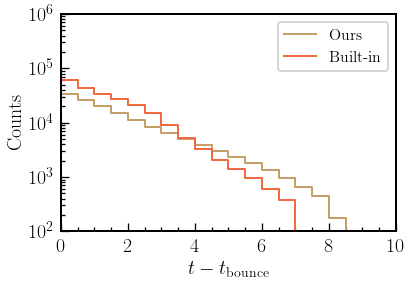

In [6]:
outfile = "./data/sm_flux_1m_with_division.txt"
distance = 1
sm_flux0.write_params(outfile, scale=(distance*units["m"] / (10 * units["kpc"]))**2)

dt = 0.5 * u.s
sim_kwargs = {
    "Emin": 0*u.MeV,
    "Emax": 400*u.MeV,
    "dE": 0.5*u.MeV,
    "tmin": -1*u.s,
    "tmax": 20*u.s,
    "dt": 1*u.ms,
    "mixing_scheme": 'AdiabaticMSW',
    "hierarchy": 'normal',
}

analytic_model = {
    'name': 'Analytic3Species',
    'param': {
        'filename': outfile
    }
}

analytic_sim = Simulation(
    distance=distance * u.m,
    model=analytic_model,
    **sim_kwargs
)

analytic_sim.run()
analytic_sim.rebin_result(dt)

t1, hits1 = analytic_sim.detector_signal(dt)

param = {'progenitor_mass': 11.2 * u.solMass}
model = "Bollig_2016"

builtin_model = {
    'name': model,
    'param': param
}

builtin_sim = Simulation(
    model=builtin_model,
    distance=10.0 * u.kpc,
    **sim_kwargs
)
builtin_sim.run()
builtin_sim.rebin_result(dt)
t2, hits2 = builtin_sim.detector_signal(dt)
sm_bg = builtin_sim.detector.i3_bg(dt, size=hits2.size) + builtin_sim.detector.dc_bg(dt, size=hits2.size)

fig, ax = plt.subplots()

ax.step(t1, hits1, label=r"Ours")
ax.step(t2, hits2, label="Built-in")
ax.legend(fontsize=16)
ax.set(
    ylim=(1e2, 1e6),
    xlim=(0, 10),
    yscale="log",
)
ax.set_xlabel(xlabel=r"$t - t_{\rm{bounce}}$", fontsize=20)
ax.set_ylabel(ylabel=r"$\rm{Counts}$", fontsize=20)
plt.show()

In [9]:
print(f"The number of hits from the built-in simulation is {hits2.sum()}")

The number of hits from the built-in simulation is 331333.91240631917


In [10]:
print(f"The number of hits from the our simulation is {hits1.sum()}")

The number of hits from the our simulation is 198104.3983738841


In [11]:
import asteria